## Análisis de negocio – Campaña de diciembre (Bike Sales)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("../datasets/bikesales_clean.xlsx")

## 1. KPIs principales de diciembre

In [5]:
kpi = {}

# Volumen
kpi["pedidos"] = df["sales_order"].count()
kpi["unidades_vendidas"] = df["order_quantity"].sum()

# Revenue y costes
kpi["revenue_total"] = df["revenue"].sum()
kpi["coste_total"] = df["cost"].sum()

# Beneficio y margen
kpi["beneficio_total"] = df["profit"].sum()
kpi["margen_porcentual"] = (df["profit"].sum() / df["revenue"].sum()) * 100
kpi["margen_medio_por_pedido"] = df["profit"].sum() / df["sales_order"].nunique()

# Ticket medio
kpi["ticket_medio"] = df["revenue"].mean()


# Tops
kpi["pais_top"] = df.groupby("country")["revenue"].sum().idxmax()
kpi["producto_top"] = df.groupby("product_description")["order_quantity"].sum().idxmax()

## 2. Visión global de negocio



### 2.1 Serie temporal de ventas

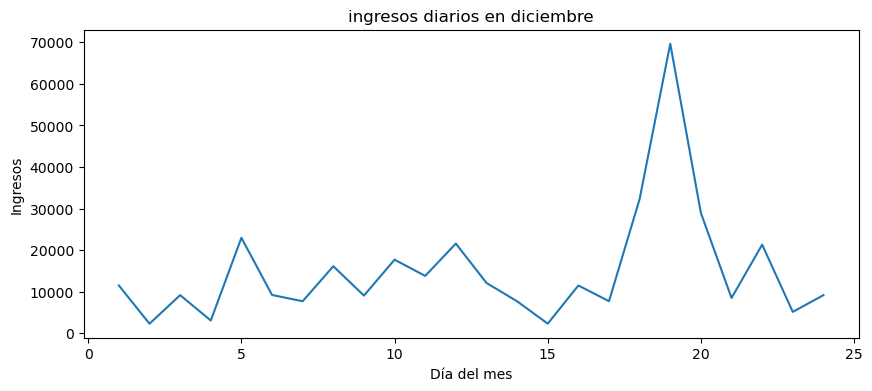

In [6]:
df["day"] = df["date"].dt.day

rev_day = df.groupby("day")["revenue"].sum()

plt.figure(figsize=(10,4))
sns.lineplot(x=rev_day.index, y=rev_day.values)
plt.title("ingresos diarios en diciembre")
plt.xlabel("Día del mes")
plt.ylabel("Ingresos")
plt.show()


El pico de ventas se produce los días 18 y 19 de diciembre 

In [7]:
df.date.dt.day.value_counts().head(3)

date
19    10
18     7
22     6
Name: count, dtype: int64

### 2.2 Ingresos por pedido

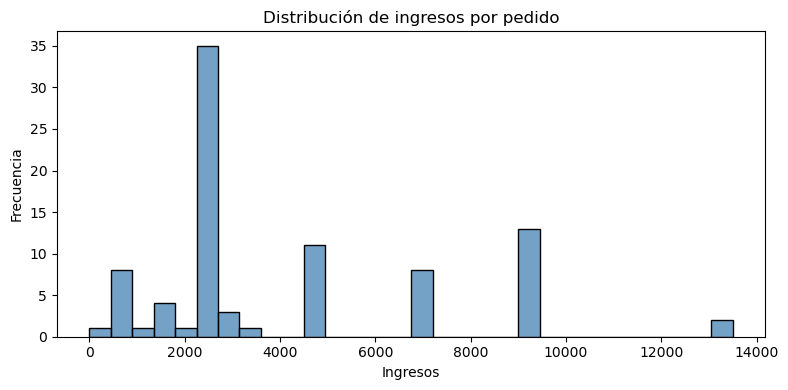

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df,
    x="revenue",
    bins=30,
    color="steelblue",
    edgecolor="black",
    alpha=0.75
)
plt.title("Distribución de ingresos por pedido", fontsize=12)
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


La moda corresponde a los precios de los modelos mountain-200 que como veremos más adelante son los más demandados

In [9]:
df.revenue.value_counts()
df.groupby("product_description")["unit_price"].value_counts()

product_description  unit_price
mountain-100         3375           3
                     3400           1
mountain-200         2295          35
                     2320          27
mountain-400-w       769           12
mountain-500         540            6
                     565            4
Name: count, dtype: int64

## 3. Análisis relativo a cliente

### 3.1 Edades de los clientes

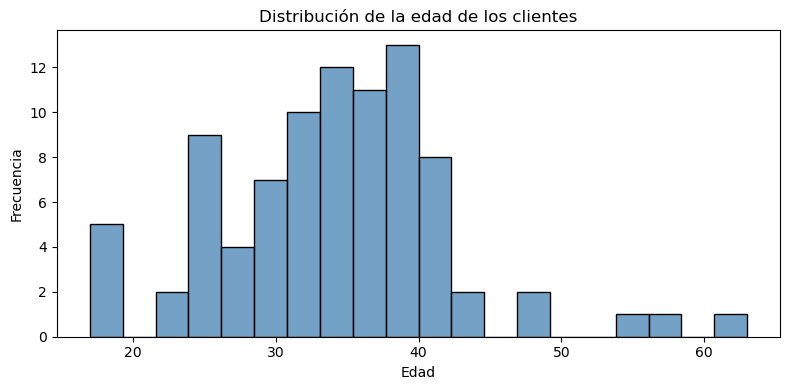

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df,
    x="customer_age",
    bins=20,
    color="steelblue",
    edgecolor="black",
    alpha=0.75
)
plt.title("Distribución de la edad de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


Estadisticos relativos a la edad del cliente

In [11]:
df.customer_age.mean().round(2) # 34.17
df.customer_age.median() # 35.0
df.customer_age.max() # 63
df.customer_age.min() # 17

17

### 3.2 Procedencia de los clientes por volumen de ventas

por país:

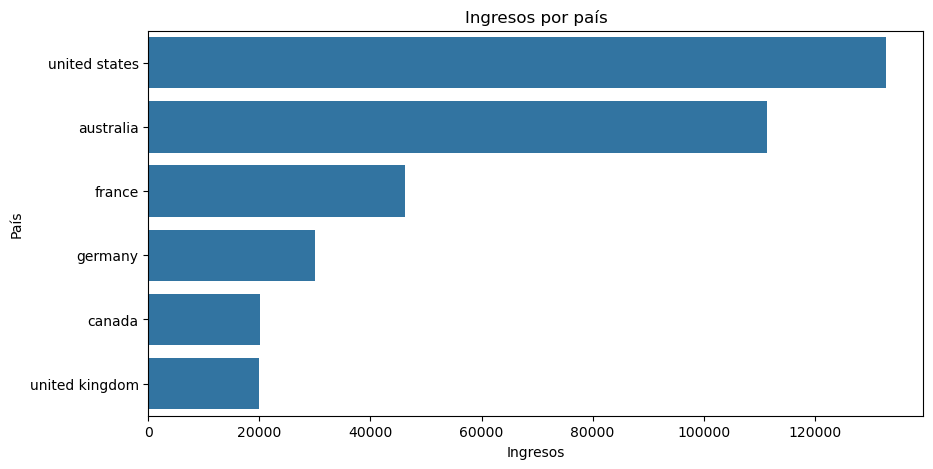

In [12]:
rev_country = df.groupby("country")["revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=rev_country.values, y=rev_country.index)
plt.title("Ingresos por país")
plt.xlabel("Ingresos")
plt.ylabel("País")
plt.show()


por estado:

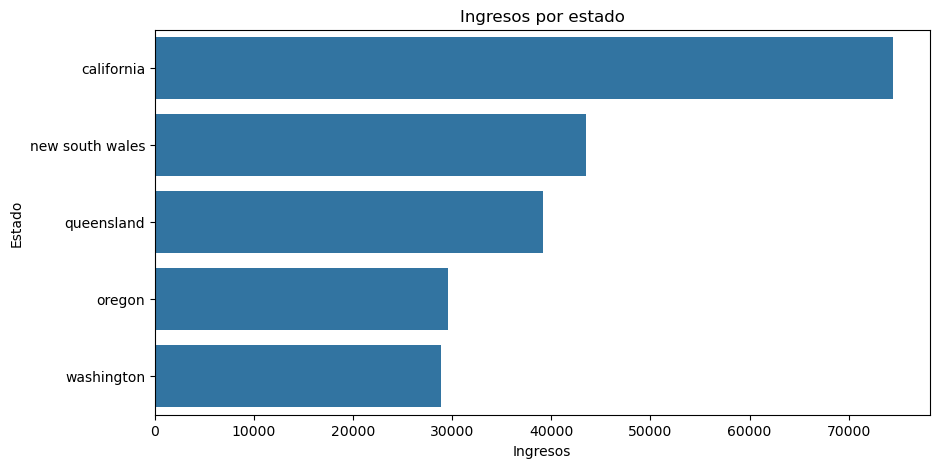

In [13]:
rev_country = df.groupby("state")["revenue"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=rev_country.values, y=rev_country.index)
plt.title("Ingresos por estado")
plt.xlabel("Ingresos")
plt.ylabel("Estado")
plt.show()


### 3.3 Genero de los clientes

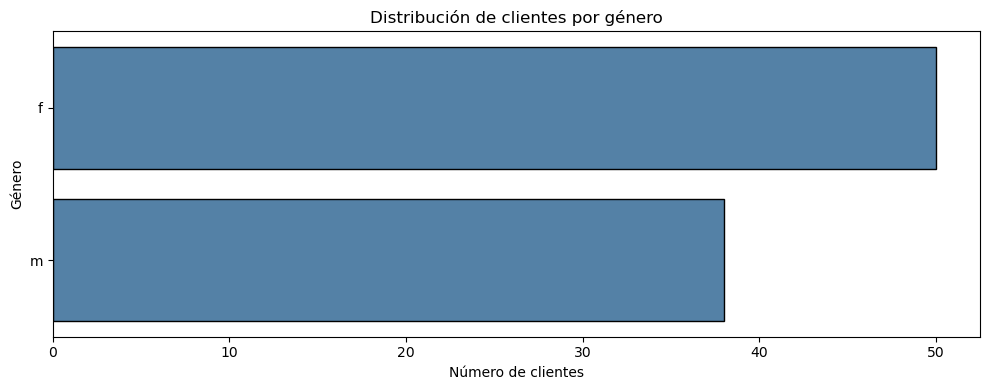

In [14]:

gender_counts = df["customer_gender"].value_counts(dropna=False)

plt.figure(figsize=(10,4))
sns.barplot(
    x=gender_counts.values,
    y=gender_counts.index,
    color="steelblue",
    edgecolor="black"
)
plt.title("Distribución de clientes por género", fontsize=12)
plt.xlabel("Número de clientes")
plt.ylabel("Género")
plt.tight_layout()
plt.show()



## 

## 4. Análisis relativo a producto

### 4.1 Modelo más demandado

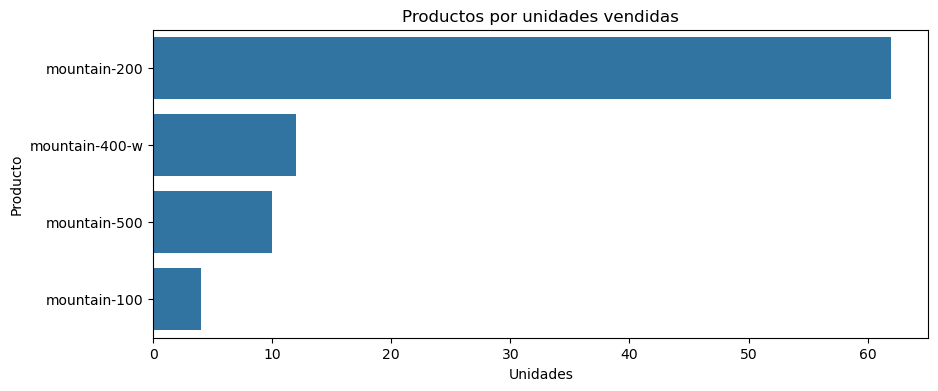

In [15]:
top_prod = df["product_description"].value_counts().nlargest()

plt.figure(figsize=(10,4))
sns.barplot(x=top_prod.values, y=top_prod.index)
plt.title("Productos por unidades vendidas")
plt.xlabel("Unidades")
plt.ylabel("Producto")
plt.show()


margen medio por modelo: 

In [19]:
df["margen_unitario"] = (df.revenue - df.cost) / df.order_quantity
df.groupby("product_description")["margen_unitario"].mean()

product_description
mountain-100      1479.750000
mountain-200      1047.790323
mountain-400-w     349.000000
mountain-500       249.800000
Name: margen_unitario, dtype: float64

### 4.2 Color más demandado

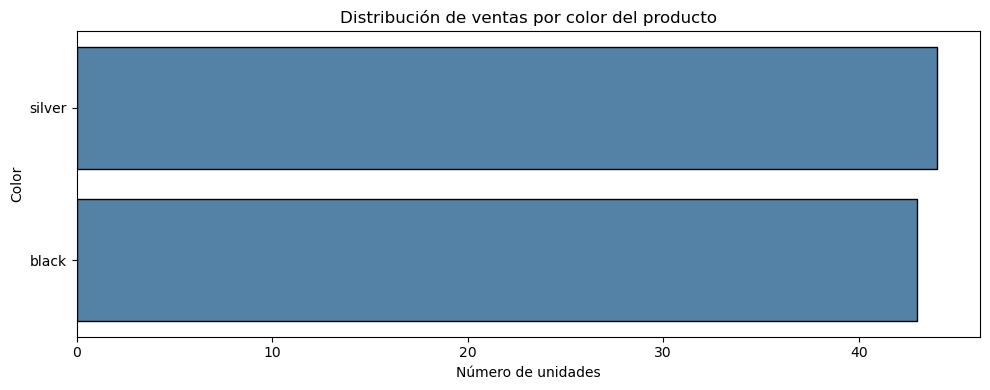

In [17]:
color_counts = df["product_color"].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(
    x=color_counts.values,
    y=color_counts.index,
    color="steelblue",
    edgecolor="black"
)
plt.title("Distribución de ventas por color del producto")
plt.xlabel("Número de unidades")
plt.ylabel("Color")
plt.tight_layout()
plt.show()


### 4.3 Tamaño más demandado

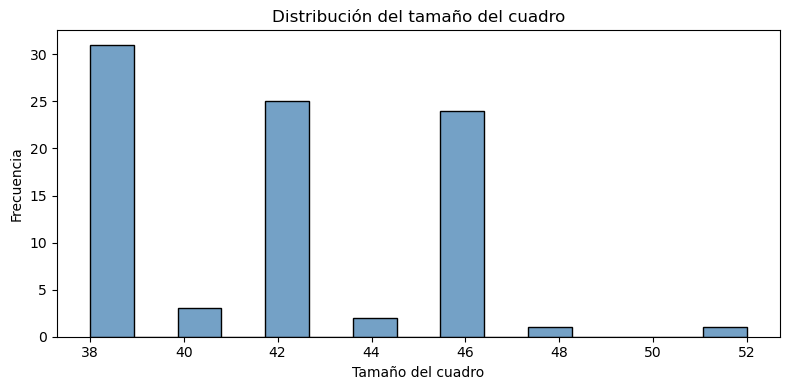

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df,
    x="frame_size",
    bins=15,
    color="steelblue",
    edgecolor="black"
)
plt.title("Distribución del tamaño del cuadro")
plt.xlabel("Tamaño del cuadro")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()
